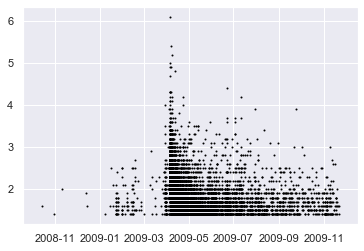

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="darkgrid")
a=pd.read_csv("C:\\Users\Ogeid99\Desktop\DS\excel\catalogo_l'aquila.txt",sep='|')
time=a['Time']
magnitude=a['Magnitude']
time_plot=[i.split('T') for i in time]
time_plot=[ datetime.datetime.strptime(z, '%Y-%m-%d') for z,w in time_plot]
plot=plt.scatter(time_plot, magnitude, color='black',s=1)# palette= sets the colour of hue
 #plot.set(yscale="log")
#plt.xlim([np.min(time_plot), np.max(time_plot)])  
#plt.xticks(np.arange(1,10000, 5000)) #authomatically it considers dates

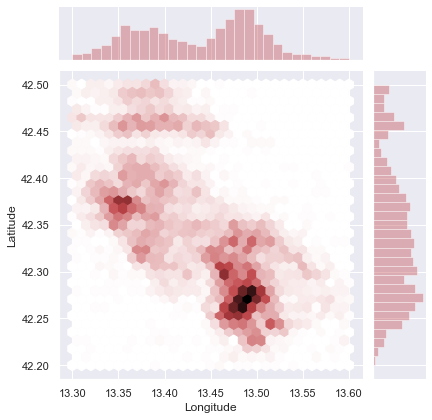

In [57]:
bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.2)))
number_of_earthquakes= pd.Series(np.array([np.count_nonzero((magnitude >= i ) & (magnitude <= i+0.2))
                                           for i in bin_magnitude]))
bin_magnitude=np.add(bin_magnitude,0.1)
number_of_earthquakes
sns.jointplot(x="Longitude", y="Latitude", data=a, kind='hex', color='r') #number of events are represented by shades of red

<BarContainer object of 284 artists>

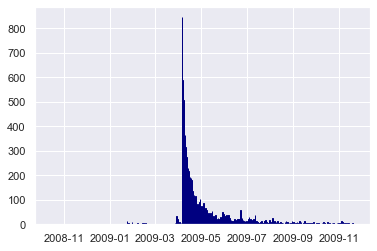

In [100]:
#how many earthquakes per day
a['Time']=time_plot
a['Time']
  #plot=plt.scatter(time_plot,, color='black',s=1)# palette= sets the colour of hue
b=a.sort_values(by='Time')
count=pd.Series([1 for i in range(len(a))])
count.name='Count'
b=pd.concat([b,count],axis=1)
b=b['Count'].groupby(b['Time'])
b_sum=pd.Series(b.sum())
#sns.distplot(b_sum,kde=False) # frequency of earthquakes per count
#b_sum.index().tolist(b_sum)
b_sum_index=b_sum.index.values
plt.bar(b_sum_index,b_sum,edgecolor='navy') #edgecolor: bar color

In [ ]:


a=pd.read_csv("C:\\Users\Ogeid99\Desktop\DS\excel\catalogo_l'aquila.txt",sep='|')